# Part 1: Data Loading & Preparation

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import numpy as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.impute import KNNImputer                 # KNN for Missing Values
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import gender_guesser.detector as gender            # guess gender based on (given) name

# loading data    
file = "./dataset/GOT_character_predictions.xlsx"

#
got = pd.read_excel(io = file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 15)


,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [2]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [3]:
#printing the info of the dataset
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [4]:
#converting object into string datatypes
got['title'] = got['title'].astype(str)
got['name'] = got['name'].astype(str)

In [5]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [6]:
# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [7]:
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
0,1,Viserys II Targaryen,nan,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,0,0,0,1,1,0,0,0,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,1,1,1,0,0,1,1,1,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,1,1,1,1,1,0,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,1,0,1,1,1,0,0,1,1,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,1,1,1,0,0,1,1,1,0,0


In [8]:
#pulling up data dictionary
# pulling up data dictionary
got_description =pd.read_excel("./documentation/GOT_data_dictionary.xlsx")


# displaying the data dictionary
got_description


,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


# Part 2: Feature Engineering

In [9]:
# analyzing features for missing value imputation and categorical encoding
# First Step
    # name - can drop after imputation
    # title - create a for loop and nested condition
    # male - create column and use gender_guesser

#Second Step
    #age
    #dateOfBirth

# title - missing - categorical value
# culture - missing - categorical value fill uknown 
# male - creating a new column for imputing the missing data with name using gender guess. 
# dateOfBirth - missing - can drop after imputation

# mother - missing - input Unknown - can drop after imputation 
# father - missing - input Unknown - can drop after imputation 
# heir - missing - input Unknown - can drop after imputation 
# house - missing - input Unknown - can drop after imputation
# spouse - missing - input Unknown - can drop after imputation


# Missing Values
# isAliveMother - missing  - imputing the with mother
# isAliveFather - missing  - imputing the with father
# isAliveHeir - missing - imputing the with heir
# isAliveSpouse - missing - - imputing the with Spouse
# age - missing - is a mom/dad/heir/female/male/spouse

#No Problem
# Book 1 - 
# Book 2 - 
# Book 3 - 
# Book 4 - 
# Book 5 - 
# isMarried - 
# isNoble - 
# numDeadRelations -
# popularity - 

In [10]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                            0
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_culture                        0
m_dateOfBirth                    0
m_mother                         0
m_father            

# Creating a new column for gender

In [11]:
#testing i for for loops
for i in got.columns:
    print(i)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive
m_culture
m_dateOfBirth
m_mother
m_father
m_heir
m_house
m_spouse
m_isAliveMother
m_isAliveFather
m_isAliveHeir
m_isAliveSpouse
m_age


In [12]:
#printing the title using value count
got['title'].value_counts(normalize = False, 
                         sort = True, 
                         ascending = False)

nan                                                            1008
Ser                                                             384
Maester                                                          39
Archmaester                                                      21
Lord                                                             20
Septon                                                           18
Winterfell                                                       17
Princess                                                         16
Lady                                                             12
Septa                                                            10
King in the North                                                 9
Prince                                                            9
Lord Commander of the Night's Watch                               9
Grand Maester                                                     8
Cupbearer                                       

In [13]:
#Step 1: creating a list to identify gender with title
#creating a list for male_title and female_title
male_title = ['ser', 'king', 'lord','winterfell', 'prince', 'archmaester',
              'guards','khal','bloodrider','wisdom','master','maester',
              'brother','knight','brother', 'son', 'men', 
              'first', 'last', 'septo', 'chief','protector','commander',]
female_title  = ['queen', 'princess', 'lady', 'maid', 'daughter','sister',
                'septa']



# placeholder list
placeholder_lst = []


# looping over each title using for loops
for index, col in got.iterrows():
    
    #creating if statement for female title
    #if title contains in female_title list, then true
    if [i for i in female_title if(i in str.lower(got.loc[index, 'title']))]:
        placeholder_lst.append('female')
    
        
        
     #creating if statement for male title
    #if title contains in male_title list, then true
    elif [i for i in male_title if(i in str.lower(got.loc[index, 'title']))]:
        placeholder_lst.append('male')
        
    #else use gender guesser to detect character's gender through name
    else:
        guess = gender.Detector().get_gender(got.loc[index, 'name'])
        placeholder_lst.append(guess)
       
            

# converting placeholder_lst into a DataFrame 
gender_df = pd.DataFrame(placeholder_lst)


# displaying the results
gender_df

,0
0,unknown
1,male
2,male
3,female
4,unknown
...,...
1941,unknown
1942,unknown
1943,unknown
1944,unknown


In [24]:
#checking the result of the genders from title
gender_df.value_counts(normalize = False,
                      sort = False,
                      ascending = False)

gender       
female             97
male              710
mostly_female       5
mostly_male         3
unknown          1131
dtype: int64

In [25]:
#Step 2 concatenating with original DataFrame

got = pd.read_excel(file)

#renaming column to concatenate
gender_df.columns = ['gender']


#concatenating name_title with GOT DataFrame
got = pd.concat([got, gender_df['gender']], axis = 1)

#printing value counts of name_title
#printing the title using value count
got['gender'].value_counts(normalize = False, 
                         sort = False, 
                         ascending = False)

unknown          1131
male              710
female             97
mostly_male         3
mostly_female       5
Name: gender, dtype: int64

In [26]:
got['title'].isnull().any()

True

In [27]:
#checking for result
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,male
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,male
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,female
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,unknown


In [28]:
# one hot encoding variables
dummies_gender = pd.get_dummies(got['gender'])

#joining codings together
got = got.join(other = [dummies_gender])

# checking results
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'gender', 'female', 'male', 'mostly_female', 'mostly_male', 'unknown'], dtype='object')

In [29]:
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender,female,male,mostly_female,mostly_male,unknown
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,unknown,0,0,0,0,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,male,0,1,0,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,male,0,1,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,female,1,0,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,unknown,0,0,0,0,1


In [30]:
#combining result from male and mostly male
got['isMale'] = got['male'] + got['mostly_male']

#combining result all non categories from dummies
got['isNotMale'] = got['female'] + got['mostly_female'] + got['unknown']

# dropping gender dummies after merging
got = got.drop(['male','female','mostly_male','mostly_female','unknown','gender'], axis = 1)




got.head(n = 15)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isMale,isNotMale
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,0,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,1,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,1,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1,0,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0,1,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0,0,1
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0,1,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1,1,0


# Imputing Missing Values for Age with Median and Creating Dummy Variables

In [31]:
#checking the values of dateOfbirth and age to see correlation
got[['age', 'dateOfBirth']].value_counts(normalize = False,
                      sort = False,
                      ascending = False)

age        dateOfBirth
-298001.0   298299.0       1
-277980.0   278279.0       1
 0.0        105.0          1
            248.0          1
 1.0        298.0          1
 2.0        281.0          1
 3.0        127.0          1
            280.0          1
 5.0        295.0          1
            300.0          1
 6.0        123.0          1
            299.0          5
 7.0        298.0          1
 8.0        297.0          2
 9.0        290.0          1
            291.0          1
            296.0          6
 10.0       123.0          1
            295.0          6
 11.0       294.0          7
 12.0       184.0          2
            264.0          1
            293.0          6
 13.0       183.0          1
            236.0          1
            285.0          1
            286.0          1
            292.0          4
 14.0       275.0          1
            285.0          2
            291.0          4
 15.0       99.0           1
            274.0          1
            284.0   

In [32]:
# soft coding MEDIAN for age and dateOfBirth
age_median = got['age'].median()
dob_median = got['dateOfBirth'].median()


# filling age NAs with MEDIAN
got['age'].fillna(value = age_median,
                         inplace = True)
# filling dateOfBirth NAs with MEDIAN

got['dateOfBirth'].fillna(value = dob_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(got[['age', 'dateOfBirth']].isnull().any())
    

age            False
dateOfBirth    False
dtype: bool


In [33]:
# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns


#checking for missing values
got.isnull().any()

S.No                          False
name                          False
title                          True
culture                        True
dateOfBirth                   False
mother                         True
father                         True
heir                           True
house                          True
spouse                         True
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                  True
isAliveFather                  True
isAliveHeir                    True
isAliveSpouse                  True
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
isMale                        False
isNotMale                     False
m_title                     

In [34]:
#strategy for categorical values
#imputing missing values of the categorical values with Unknown
got['mother'] = got['mother'].fillna('Unknown')
got['father'] = got['father'].fillna('Unknown')
got['spouse'] = got['spouse'].fillna('Unknown')
got['heir'] = got['heir'].fillna('Unknown')



# checking results
got[['mother','father','spouse','heir']].isnull().sum(axis = 0)

mother    0
father    0
spouse    0
heir      0
dtype: int64

In [40]:
# placeholder for 'mother' feature
got['isAliveMother'] = 1


# replacing values based on a condition
for index, val in got.iterrows():
    if got.loc[index, 'mother'] == 'Unknown':
        got.loc[index, 'isAliveMother'] = 1




# placeholder for 'mother' feature
got['isAliveFather'] = 1


# replacing values based on a condition
for index, val in got.iterrows():
    if got.loc[index, 'father'] == 'Unknown':
        got.loc[index, 'isAliveFather'] = 1

        
        
        

# placeholder for 'mother' feature
got['isAliveSpouse'] = 1


# replacing values based on a condition
for index, val in got.iterrows():
    if got.loc[index, 'spouse'] == 'Unknown':
        got.loc[index, 'isAliveSpouse'] = 1
        
# placeholder for 'mother' feature
got['isAliveHeir'] = 1


# replacing values based on a condition
for index, val in got.iterrows():
    if got.loc[index, 'heir'] == 'Unknown':
        got.loc[index, 'isAliveHeir'] = 1
        
        
got.isnull().any()

S.No                          False
name                          False
title                          True
culture                        True
dateOfBirth                   False
mother                        False
father                        False
heir                          False
house                          True
spouse                        False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
isMale                        False
isNotMale                     False
m_title                     

In [42]:
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isMale,isNotMale,m_title,m_culture,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,Unknown,0,0,0,0,0,1,1,1,1,0,0,27.0,11,0.605351,0,0,1,1,1,0,0,0,1,1,0,0,0,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,Unknown,Unknown,Unknown,House Frey,Perra Royce,1,1,1,1,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,0,0,0,1,1,1,0,0,1,1,1,0
2,3,Addison Hill,Ser,NaN,268.0,Unknown,Unknown,Unknown,House Swyft,Unknown,0,0,0,1,0,1,1,1,1,0,1,27.0,0,0.267559,1,1,0,0,1,1,1,1,0,1,1,1,1,1
3,4,Aemma Arryn,Queen,NaN,82.0,Unknown,Unknown,Unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,1,1,1,1,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,1,0,0,1,1,1,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,Unknown,Unknown,Unknown,House Santagar,Eldon Estermont,0,0,0,1,0,1,1,1,1,1,1,29.0,0,0.043478,1,0,1,0,0,1,1,1,0,0,1,1,1,0


In [43]:
# looping to make the column names
for val in got:
    print(f"'{val}', ")

'S.No', 
'name', 
'title', 
'culture', 
'dateOfBirth', 
'mother', 
'father', 
'heir', 
'house', 
'spouse', 
'book1_A_Game_Of_Thrones', 
'book2_A_Clash_Of_Kings', 
'book3_A_Storm_Of_Swords', 
'book4_A_Feast_For_Crows', 
'book5_A_Dance_with_Dragons', 
'isAliveMother', 
'isAliveFather', 
'isAliveHeir', 
'isAliveSpouse', 
'isMarried', 
'isNoble', 
'age', 
'numDeadRelations', 
'popularity', 
'isAlive', 
'isMale', 
'isNotMale', 
'm_title', 
'm_culture', 
'm_mother', 
'm_father', 
'm_heir', 
'm_house', 
'm_spouse', 
'm_isAliveMother', 
'm_isAliveFather', 
'm_isAliveHeir', 
'm_isAliveSpouse', 


In [50]:
#dropping categorical values
# dropping gender dummies after merging
got = got.drop(['S.No','name','title','culture','mother',
                'father','heir','house','spouse','m_isAliveMother',
                'm_isAliveFather','m_isAliveHeir','m_isAliveSpouse',], axis = 1)


KeyError: "['S.No' 'name' 'title' 'culture' 'mother' 'father' 'heir' 'house' 'spouse'\n 'm_isAliveMother' 'm_isAliveFather' 'm_isAliveHeir' 'm_isAliveSpouse'] not found in axis"

In [53]:
got = got.drop(['m_mother','m_father','m_heir','m_spouse'], axis = 1)

In [54]:
got

,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isMale,isNotMale,m_title,m_culture,m_house
0,268.0,0,0,0,0,0,1,1,1,1,0,0,27.0,11,0.605351,0,0,1,1,1,1
1,208.0,1,1,1,1,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,0,0,0,0
2,268.0,0,0,0,1,0,1,1,1,1,0,1,27.0,0,0.267559,1,1,0,0,1,0
3,82.0,0,0,0,0,0,1,1,1,1,1,1,23.0,0,0.183946,0,0,1,0,1,0
4,276.0,0,0,0,1,0,1,1,1,1,1,1,29.0,0,0.043478,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,268.0,1,1,1,1,1,1,1,1,1,0,0,27.0,0,0.351171,0,0,1,1,0,0
1942,268.0,0,1,0,1,1,1,1,1,1,0,0,27.0,0,0.096990,0,0,1,1,1,0
1943,268.0,1,1,1,1,1,1,1,1,1,0,0,27.0,0,0.030100,1,0,1,1,1,1
1944,268.0,0,0,1,1,1,1,1,1,1,0,0,27.0,0,0.130435,1,0,1,1,1,0


In [55]:
# relabeling columns
got.columns = ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
               'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows',
               'book5_A_Dance_with_Dragons','isAliveMother','isAliveFather',
               'isAliveHeir','isAliveSpouse','isMarried','isNoble','age',
               'numDeadRelations','popularity','isMale','isNotMale',
               'm_title','m_culture','m_house','isAlive']


# checking results
got.columns

Index(['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isMale', 'isNotMale', 'm_title', 'm_culture', 'm_house', 'isAlive'], dtype='object')

In [56]:
got.head(n= 5)

,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isMale,isNotMale,m_title,m_culture,m_house,isAlive
0,268.0,0,0,0,0,0,1,1,1,1,0,0,27.0,11,0.605351,0,0,1,1,1,1
1,208.0,1,1,1,1,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,0,0,0,0
2,268.0,0,0,0,1,0,1,1,1,1,0,1,27.0,0,0.267559,1,1,0,0,1,0
3,82.0,0,0,0,0,0,1,1,1,1,1,1,23.0,0,0.183946,0,0,1,0,1,0
4,276.0,0,0,0,1,0,1,1,1,1,1,1,29.0,0,0.043478,1,0,1,0,0,0


In [57]:
#making sure there are no more missing value
got.isnull().any()

dateOfBirth                   False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isMale                        False
isNotMale                     False
m_title                       False
m_culture                     False
m_house                       False
isAlive                       False
dtype: bool

# Part 3: Splitting the Data & Model Development

In [238]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

 Choosing the response variable

In [114]:
#Checking the correlation of the features
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
m_culture                     0.16
m_title                       0.07
isMale                        0.04
numDeadRelations              0.02
age                           0.02
dateOfBirth                  -0.02
popularity                   -0.05
isNotMale                    -0.07
m_house                      -0.09
book1_A_Game_Of_Thrones      -0.11
isMarried                    -0.16
book4_A_Feast_For_Crows      -0.16
book5_A_Dance_with_Dragons   -0.17
book3_A_Storm_Of_Swords      -0.17
isNoble                      -0.18
book2_A_Clash_Of_Kings       -0.18
close_relations                NaN
alive_clse_relatives           NaN
Name: isAlive, dtype: float64

In [213]:
#Checking the correlation of the features
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['book5_A_Dance_with_Dragons'].sort_values(ascending = False)

book5_A_Dance_with_Dragons    1.00
book4_A_Feast_For_Crows       0.34
book3_A_Storm_Of_Swords       0.29
book1_A_Game_Of_Thrones       0.26
book2_A_Clash_Of_Kings        0.23
popularity                    0.22
isMarried                     0.10
isNoble                       0.10
numDeadRelations              0.10
isMale                        0.03
m_title                       0.02
dateOfBirth                   0.01
age                          -0.01
isNotMale                    -0.02
m_culture                    -0.10
isAlive                      -0.17
m_house                      -0.18
close_relations                NaN
alive_clse_relatives           NaN
Name: book5_A_Dance_with_Dragons, dtype: float64

In [83]:
#fixing the NaN in the correlation using numpy sum
#create a placeholder list

close_relations = ['isAliveMother', 'isAliveFather','isAliveHeir','isAliveSpouse']

got['alive_clse_relatives'] = got[close_relations].sum(axis = 1)

got['alive_clse_relatives'] = got['alive_clse_relatives'].astype(int)
#for index, col in got.iterrows():
    #print(type(got.loc[index, 'alive_clse_relatives']))





<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

In [86]:
got = got.drop(['isAliveMother','isAliveFather','isAliveSpouse','isAliveHeir'], axis = 1)

In [297]:
#checking the numbers of one and zero in the response variable
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

0    0.78
1    0.22
Name: isAlive, dtype: float64

In [298]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[:, 'isAlive']

In [299]:
# train-test split with stratification
x_test, x_train, y_test, y_train = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [300]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
0    0.78
1    0.22
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
0    0.78
1    0.22
Name: isAlive, dtype: float64



In [301]:
# looping to make x-variables suitable for statsmodels
for val in got:
    print(f"{val} +")

dateOfBirth +
book1_A_Game_Of_Thrones +
book2_A_Clash_Of_Kings +
book3_A_Storm_Of_Swords +
book4_A_Feast_For_Crows +
book5_A_Dance_with_Dragons +
isMarried +
isNoble +
age +
numDeadRelations +
popularity +
isMale +
isNotMale +
m_title +
m_culture +
m_house +
isAlive +
close_relations +
alive_clse_relatives +


Trial 1

In [302]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book5_A_Dance_with_Dragons  """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.441279
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.164     
Dependent Variable:    isAlive             AIC:                 176.0987  
Date:                  2021-12-05 16:10    BIC:                 182.6447  
No. Observations:      195                 Log-Likelihood:      -86.049   
Df Model:              1                   LL-Null:             -102.87   
Df Residuals:          193                 LLR p-value:         6.6034e-09
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  -0.5411   0.2014 -2.6867 0.0072 -0.9359 -0.1464
book5_A_Dance_with_Dragons -2.5152   0.5498 -4.5744 0.0000 -3.5929 -1.4375
==========================================================================

"""

Trial 2 - Full Model

In [303]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive~ dateOfBirth +
                                                    book1_A_Game_Of_Thrones +
                                                    book2_A_Clash_Of_Kings +
                                                    book3_A_Storm_Of_Swords +
                                                    book4_A_Feast_For_Crows +
                                                    book5_A_Dance_with_Dragons +
                                                    isMarried +
                                                    isNoble +
                                                    age +
                                                    numDeadRelations +
                                                    popularity +
                                                    isMale +
                                                    m_title +
                                                    m_culture +
                                                    m_house +
                                                    alive_clse_relatives """,
                                                    data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.362111
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.314     
Dependent Variable:    isAlive             AIC:                 173.2234  
Date:                  2021-12-05 16:10    BIC:                 225.5914  
No. Observations:      195                 Log-Likelihood:      -70.612   
Df Model:              15                  LL-Null:             -102.87   
Df Residuals:          179                 LLR p-value:         4.1407e-08
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  -0.0904      nan     nan    nan     nan     nan
dateOfBirth                 0.0092   0.0167  0.5482 0.5835 -0.0236  0.0419
book1_A_Game_Of_Thrones     0.0678   0.6887  0.0984 0.9216 -1.2821  1.4177
book2_A_Clash_Of_Kings     -1.2196   0.5829 -2.0924 0.0364 -2.3620 -0.0772
book3_A_Storm_Of_Swords    -0.7221   0.5352 -1.3492 0.1773 -1.7711  0.3269
book4_A_Feast_For_Crows    -0.1939   0.4848 -0.4001 0.6891 -1.1441  0.7562
book5_A_Dance_with_Dragons -2.7931   0.6865 -4.0687 0.0000 -4.1386 -1.4476
isMarried                  -0.0757   0.8767 -0.0864 0.9312 -1.7941  1.6426
isNoble                    -0.2401   1.1444 -0.2098 0.8338 -2.4831  2.0030
age                        -0.0260   0.0320 -0.8108 0.4175 -0.0887  0.0368
numDeadRelations            0.6280   0.2465  2.5481 0.0108  0.1450  1.1110
popularity                 -2.7610   2.3525 -1.1737 0.2405 -7.3717  1.8497
isMale                     -0.2242   0.6475 -0.3462 0.7292 -1.4933  1.0450
m_title                     0.4196   1.0372  0.4045 0.6858 -1.6133  2.4525
m_culture                   0.7137   1.4760  0.4835 0.6287 -2.1792  3.6067
m_house                    -0.5114   0.4931 -1.0370 0.2997 -1.4779  0.4551
alive_clse_relatives       -0.3616      nan     nan    nan     nan     nan
==========================================================================

"""

Trial 3 - Removing all features with high coefficient

In [304]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book2_A_Clash_Of_Kings +
                                                    book5_A_Dance_with_Dragons +
                                                    isNoble +
                                                    isMarried +
                                                    m_house +
                                                    age +
                                                    popularity +
                                                    numDeadRelations  """,
                                                    data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.371794
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.295     
Dependent Variable:    isAlive             AIC:                 162.9995  
Date:                  2021-12-05 16:10    BIC:                 192.4565  
No. Observations:      195                 Log-Likelihood:      -72.500   
Df Model:              8                   LL-Null:             -102.87   
Df Residuals:          186                 LLR p-value:         3.3247e-10
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   1.6520   0.8777  1.8821 0.0598 -0.0683  3.3724
book2_A_Clash_Of_Kings     -1.2868   0.5050 -2.5483 0.0108 -2.2766 -0.2971
book5_A_Dance_with_Dragons -2.8457   0.6576 -4.3277 0.0000 -4.1345 -1.5569
isNoble                    -1.2057   0.4542 -2.6549 0.0079 -2.0958 -0.3156
isMarried                  -0.5979   0.7840 -0.7625 0.4457 -2.1346  0.9388
m_house                    -0.6113   0.4624 -1.3219 0.1862 -1.5177  0.2950
age                        -0.0306   0.0279 -1.0969 0.2727 -0.0852  0.0241
popularity                 -2.4628   2.0842 -1.1817 0.2373 -6.5477  1.6221
numDeadRelations            0.6234   0.2296  2.7148 0.0066  0.1733  1.0735
==========================================================================

"""

In [305]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """ isAlive ~ dateOfBirth +
                                                    book5_A_Dance_with_Dragons+
                                                    isMarried +
                                                    isNoble +
                                                    age +
                                                    numDeadRelations +
                                                    popularity +
                                                    isMale +
                                                    m_title +
                                                    m_culture +
                                                    m_house +
                                                    alive_clse_relatives """,
                                                    data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.388202
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
============================================================================================
Model:                       Logit                     Pseudo R-squared:          0.264     
Dependent Variable:          isAlive                   AIC:                       175.3988  
Date:                        2021-12-05 16:11          BIC:                       214.6748  
No. Observations:            195                       Log-Likelihood:            -75.699   
Df Model:                    11                        LL-Null:                   -102.87   
Df Residuals:                183                       LLR p-value:               1.0197e-07
Converged:                   1.0000                    Scale:                     1.0000    
No. Iterations:              8.0000                                                         
--------------------------------------------------------------------------------------------
                            Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------------------------
Intercept                  -0.0028 39103580.1448 -0.0000 1.0000 -76641608.7531 76641608.7475
dateOfBirth                 0.0018        0.0138  0.1338 0.8936        -0.0252        0.0289
book5_A_Dance_with_Dragons -3.0982        0.6863 -4.5144 0.0000        -4.4434       -1.7531
isMarried                  -1.0993        0.7520 -1.4619 0.1438        -2.5732        0.3745
isNoble                    -0.5041        1.0389 -0.4852 0.6275        -2.5403        1.5321
age                        -0.0217        0.0291 -0.7478 0.4546        -0.0787        0.0352
numDeadRelations            0.5717        0.2216  2.5804 0.0099         0.1375        1.0060
popularity                 -2.2314        2.0920 -1.0666 0.2861        -6.3316        1.8688
isMale                      0.2098        0.5207  0.4028 0.6871        -0.8109        1.2304
m_title                     0.4518        0.9484  0.4763 0.6338        -1.4072        2.3107
m_culture                   0.1517        1.3599  0.1116 0.9112        -2.5137        2.8171
m_house                    -0.7643        0.4691 -1.6295 0.1032        -1.6837        0.1550
alive_clse_relatives       -0.0110  9775895.0362 -0.0000 1.0000 -19160402.1986 19160402.1765
============================================================================================

"""

In [279]:
########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logit_full'   : ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons',
                   'isMarried','isNoble','age','numDeadRelations','popularity',
                   'isMale','isNotMale','m_title','m_culture','m_house'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book2_A_Clash_Of_Kings', 'book5_A_Dance_with_Dragons','isMarried','isNoble','age',
                    'numDeadRelations','popularity','m_house',],
    
    
    
 'logit_sig2'   : ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows',
                   'isMarried','isNoble','age','numDeadRelations','popularity',
                   'isMale','isNotMale','m_title','m_culture','m_house'],
    

    
}



########################################
# checking previous model performances
########################################

In [307]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


First Book 5 Y-Variable Model:
--------------------------------
{candidate_dict['logit_sig2']}


""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isMale', 'isNotMale', 'm_title', 'm_culture', 'm_house']


First Significant p-value Model:
--------------------------------
['book2_A_Clash_Of_Kings', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'm_house']


First Book 5 Y-Variable Model:
--------------------------------
['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isMale', 'isNotMale', 'm_title', 'm_culture', 'm_house']





# Trying out Standardization

In [308]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(got_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(got_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,0.0,1946.0
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,NaN,0.0
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,0.0
min,-0.06,-0.50,-0.77,-0.96,-1.20,-0.81,-0.41,-0.92,-32.24,-0.22,-0.56,-1.71,-0.76,-1.32,-1.04,-1.37,NaN,0.0
25%,-0.03,-0.50,-0.77,-0.96,-1.20,-0.81,-0.41,-0.92,0.03,-0.22,-0.47,-1.71,-0.76,-1.32,-1.04,-1.37,NaN,0.0
50%,-0.03,-0.50,-0.77,-0.96,0.83,-0.81,-0.41,-0.92,0.03,-0.22,-0.35,0.58,-0.76,0.76,0.96,0.73,NaN,0.0
75%,-0.03,-0.50,1.29,1.04,0.83,1.24,-0.41,1.08,0.03,-0.22,-0.02,0.58,1.32,0.76,0.96,0.73,NaN,0.0
max,32.24,2.01,1.29,1.04,0.83,1.24,2.46,1.08,0.04,10.62,5.67,0.58,1.32,0.76,0.96,0.73,NaN,0.0


In [309]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = got_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(got_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
dateOfBirth                   8.527704e+07
book1_A_Game_Of_Thrones       1.590107e-01
book2_A_Clash_Of_Kings        2.342785e-01
book3_A_Storm_Of_Swords       2.496187e-01
book4_A_Feast_For_Crows       2.415390e-01
book5_A_Dance_with_Dragons    2.390106e-01
isMarried                     1.217138e-01
isNoble                       2.484747e-01
age                           8.527281e+07
numDeadRelations              1.914222e+00
popularity                    2.576897e-02
isMale                        1.896649e-01
isNotMale                     2.321491e-01
m_title                       2.321491e-01
m_culture                     2.496765e-01
m_house                       2.268635e-01
close_relations                        NaN
alive_clse_relatives          0.000000e+00
dtype: float64


Dataset AFTER Scaling
----------------------
dateOfBirth                   1.0
book1_A_Game_Of_Thrones       1.0
book2_A_Clash_Of_Kings        1.0
book3_A_Storm_O

# Part 4: Logistic Regression

In [312]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Logreg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Logreg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy


# displaying and saving the gap between training and testing
print('Logreg Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score -logreg_test_score).round(4)

Logreg Training ACCURACY: 0.7858
Logreg Testing  ACCURACY: 0.7897
Logreg Train-Test Gap : 0.0039


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [313]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[152   0]
 [ 41   2]]


In [314]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 152
False Positives: 0
False Negatives: 41
True Positives : 2



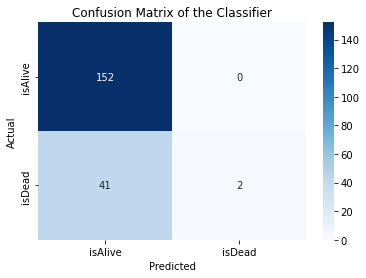

In [315]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['isAlive', 'isDead'])

In [317]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5233


# Part 5: Feature Importance

In [318]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

# Decision Tree Classifier

In [319]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8589
Full Tree Testing ACCURACY : 0.8154
Full Tree AUC Score: 0.6898


In [324]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 139
False Positives: 13
False Negatives: 23
True Positives : 20



In [325]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [323]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 8,
                    min_samples_leaf = 10,
                    random_state = 219,
                    criterio)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.8064
Testing  ACCURACY: 0.8256
AUC Score        : 0.6797


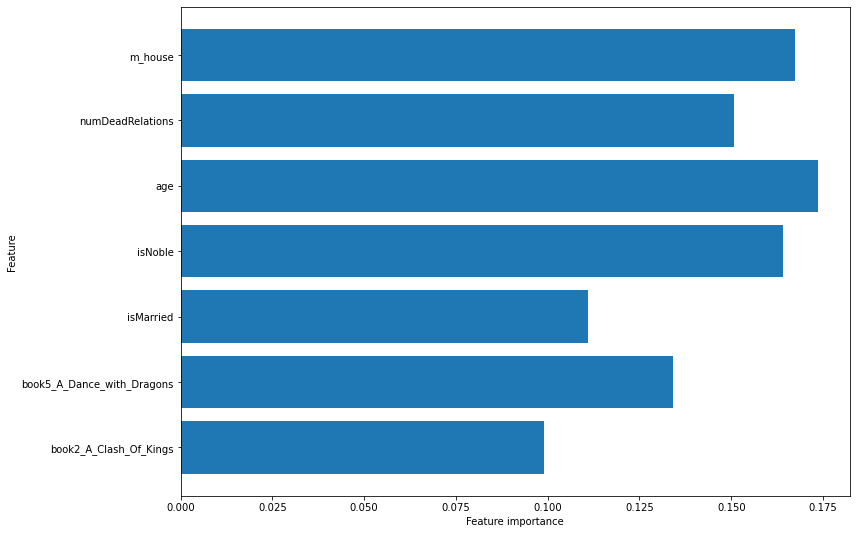

In [287]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = x_train,
                         export = False)